<img src="https://www3.um.edu.uy/logoum.jpg" width=300>
<h1 align="center">Thesis - IMF MAE</h1> 
<h2 align="center">Alejo Paullier</h2> 

https://lkpy.lenskit.org/en/stable/knn.html

In [1]:
from lenskit import batch, topn, util
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender, als
from lenskit.algorithms.als import ImplicitMF
from lenskit.metrics.predict import mae
import pandas as pd
import numpy as np

ratings = pd.read_csv('C:\\Users\\Alejo\\Tesis\\Demo\\ml-100k\\u.data', sep='\t',
                      names=['user', 'item', 'rating', 'timestamp'])


def eval(aname, algo, train, test):
    fittable = util.clone(algo) # Object cloning means to create an exact copy of the original object.
    fittable = Recommender.adapt(fittable) 
    fittable.fit(train) # train the algorithm with the training dataset
    # Now we run the recommender:
    preds = batch.predict(fittable, test)
    # add the algorithm name for analyzability
    return preds

In [3]:
all_recs = []
test_data = []

imf = ImplicitMF(features=10, iterations=100, reg=0.1) # define algorithm

In [4]:
for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 5, xf.SampleFrac(0.2)):
    test_data.append(test) # save testing data
    all_recs.append(eval('IMF', imf, train, test))

In [5]:
all_recs = pd.concat(all_recs, ignore_index=True)

D:\Programas\Anaconda\Anaconda\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Programas\Anaconda\Anaconda\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


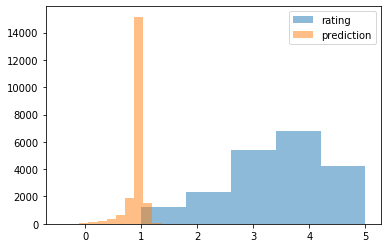

In [8]:
from matplotlib import pyplot

x = all_recs['rating']
y = all_recs['prediction']

pyplot.hist(x, bins = 5,alpha=0.5, label='rating')
pyplot.hist(y, bins = 12,alpha=0.5, label='prediction')
pyplot.legend(loc='upper right')
pyplot.show()

In [6]:
metric = mae(all_recs['prediction'], all_recs['rating'])
metric

2.5935868463613523